## Demo 8: Infrared spectroscopy.<br>

A spectrum is how molecules say hello to you.

![](files/Modo_rotacao.gif)

"<a href="https://commons.wikimedia.org/wiki/File:Modo_rotacao.gif#/media/File:Modo_rotacao.gif">Modo rotacao</a>" by Original uploader <a href="//pt.wikipedia.org/wiki/User:Tiago_Becerra_Paolini" class="extiw" title="pt:User:Tiago Becerra Paolini">Tiago Becerra Paolini</a> at <a class="external text" href="http://pt.wikipedia.org">pt.wikipedia</a> - Transferred from <a class="external text" href="http://pt.wikipedia.org">pt.wikipedia</a>. Licensed under Public Domain via <a href="https://commons.wikimedia.org/wiki/">Commons</a>.

<br>

### Introduction

In this demo we will explore how a system interacts with an external field by studying the example of a harmonic oscillator interacting with a time-dependent field (e.g. laser).

We'll **review** some of the stuff you've learned so far : 

1. The quantum harmonic oscillator.
1. How to generate an animation.

And we'll play around with some **new concepts** :

1. Time dependent hamiltonian.
2. Solutions to the harmonic oscillator interacting with a time dependent field.
3. Transition probabilities.
4. Infrared spectrum.

### <i class="fa fa-book"></i> Step 1: Import the required modules.

In [61]:
% pylab inline
import numpy as np
from matplotlib import pyplot as plt
import imp
from scipy.integrate import simps
#This is how we'll import our own homemade modules
qworld = imp.load_source('qworld', '../library/quantumWorld.py')

Populating the interactive namespace from numpy and matplotlib


### <i class="fa fa-book"></i> Step 2:  Let's see how a time-dependent field interacts with a Harmonic Oscillator

The Hamiltonian of a Harmonic Oscillator interacting with a time-dependent field (e.g. laser) is given by:
$$ \hat{H}(t) = -\frac{\hbar^2}{2m}\frac{d}{dx^2}+\frac{1}{2}m\omega_0^2x^2+\frac{2\pi}{\lambda}E_0\sin(\omega_f\;t)x $$

Notice that there are two different frequencies here:  $\omega_0$ is the frequency associated to the Harmonic Oscillator, which will have energies equal to $E_n = (n+\frac{1}{2})\hbar\omega_0$.  And $\omega_f$ is the frequency of the incoming field (i.e. laser).

The time-dependent solution for a ground state is given by the following expression (this is obtained through a technique called **Perturbation Theory**, which we have not seen in class yet):

$$\psi(x,t) = \psi_0(x) + \frac{iE_0\frac{2\pi}{\lambda}}{2\sqrt{2m\hbar\omega_0}}[\frac{e^{-i(\omega_0 - \omega_f)t}-1}{\omega_0 - \omega_f}+\frac{e^{i(\omega_0 + \omega_f)t}-1}{\omega_0 + \omega_f}]\;\psi_1(x)$$  

Here, $\psi_0(x)$ and $\psi_1(x)$ and the ground state and the first excited states of the standard (time-independent non-interacting) Harmonic Oscillator. 

We will generate an animation of how the probability density associated to this wave function evolves in time for different values of $\omega_f$, and we will observe what happens when $\omega_f \approx \omega_0$. First, we need to write a function called time_dependent_psi that returns $\psi(x,t)$ as defined above:

In [62]:
def time_dependent_psi(x, t, omega_f, omega_0 = 1, Lam = 1, E_0 = 1, m=1, hbar=1):
    '''This function returns psi(x,t) for a harmonic oscillator 
    under a time dependent field: 
    INPUTS: 
        x --> array of positions
        t --> time
        omega_f --> frequency of the field/laser that interacts with the 
                    particle in the Harmonic Oscillator
    '''
    #We'll first get the ground state of the standard HO
    psi_0 = qworld.harmonic_oscillator_wf(x,0)
    #Then we'll compute the two terms in front of the first excited state 
    term1 = 1j*E_0*(2*np.pi/Lam) / (2*np.sqrt(2*m*hbar*omega_0))
    term2 = (np.exp(-1j*(omega_0-omega_f)*t)-1) / (omega_0-omega_f) + (np.exp(1j*(omega_0+omega_f)*t)-1) / (omega_0+omega_f)
    #We'll then get the first excited state for the standard HO
    psi_1 = qworld.harmonic_oscillator_wf(x, 1)
    #######################################################################
    # (ONE LINE) COMBINE EVERYTHING INTO THE EXPRESSION FOR THE WAVEFUNCTION
    # assign the result to the variable psi_x_t
    psi_x_t = psi_0 + term1 * term2*psi_1
    #######################################################################
    return psi_x_t

### <i class="fa fa-wrench"></i> Step 3: Now let's generate an animation of the moving gaussian / ground state for a given field frequency.

Use a field frequency of $\omega_f = 3.0$. Complete code for the animation.

In [69]:
#Set the field frequency value to either an off-resonant frequency 
#(omega_f = 3) or a near-resonant frequency (omega_f = 1.1)
omega_f = 1.05

#import the animation module
from matplotlib import animation

#We'll set up the figure for you
fig = plt.figure()
ax = plt.axes(xlim=(-3, 3), ylim=(0, 1)) #create single axis in figure
plt.xlabel('position')
plt.ylabel('amplitude')
line, = ax.plot([], [], lw=2) #line is a plot.... 

#This init function will be called to create 
#the base frame upon which the animation takes place.
#we'll set it up for you as well
def init():
    line.set_data([], []) #sets the line data to nothing
    return line,  #return the line object

### COMPLETE THIS ANIMATION FUNCTION, WHICH WILL BE CALLED 
### ITERATIVELY FOR MANY VALUES OF T
def animate(t): 
    ###############################################
    # (ONE LINE) CREATE AN ARRAY OF POSITION FROM -3 TO 3, INTERVALS OF 0.01
    #CALL IT x_array
    x_array = np.arange(-3, 3, 0.01)
    ###############################################
    
    #Scale the time if necessary
    t_anim = t

    #######################################################################
    #CALL time_dependent_psi TO GENERATE THE TIME-DEPENDENT WAVEFUNCTION
    #AT TIME t, CALL THE OUTPUT psi
    psi = time_dependent_psi(x_array, t_anim, omega_f)   
    ########################################################################
    
    ################################################################################
    #NORMALIZE CALLING THE FUNCTION qworld.normalize_wf, CALL THE OUTPUT psi_norm
    psi_norm = qworld.normalize_wf(x_array, psi)
    #################################################################################

    #################################################################################
    # GET THE PDF CALLING THE FUNCTION qworld.normalize_wf, CALL THE OUTPUT pdf
    pdf = qworld.probabilityDensity(psi_norm)
    #################################################################################
    
    #Plot
    line.set_data(x_array, pdf)  #This is what you plot at each frame in the animation. 
    return line

#Let's create the animation!!!
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=200)

qworld.display_animation(anim)

Now Repeat the process above for a field frequency of $\omega_f = 1.05$, which is very close to $\omega_0$. **You might want to speed up the dynamics by changing t_anim = t. Multiply it by a factor of 2 or 3**  Do this by modifying the cell above.

#### <i class="fa fa-gear"></i> Question: After watching both animations. What can you tell about the behavior of the system as a function of $\omega_f$? Discuss it with your classmates. <br>
You can play around with different values of $\omega_f$ to get a better sense of what's happening.

### <i class="fa fa-wrench"></i> Step 4: Now, we will compute the overlap of the time-dependent wave function and the first excited state of the Harmonic Oscillator as a function of time.<br>

From the expression of the wavefunction $\psi(x,t)$ and exploiting the orthonormality of the eigenstates of the standard harmonic oscillator, we can deduce that:
$$c_1(t) =  \int_{-\infty}^{\infty}\psi^*_1(x)\;\psi(x,t)\;dx=\frac{iE_0\frac{2\pi}{\lambda}}{2\sqrt{2m\hbar\omega_0}}[\frac{e^{-i(\omega_0 - \omega_f)t}-1}{\omega_0 - \omega_f}+\frac{e^{i(\omega_0 + \omega_f)t}-1}{\omega_0 + \omega_f}]\;$$

Now complete the following function that returns the overlap of the time-dependent wave function with the first excited state.

In [64]:
def overlap(t, omega_f, omega_0 = 1, Lam = 1, E_0 = 0.1, m=1, hbar=1):
    #################################################################################
    # (ONE LINE) WRITE THE FORMULA OF THE FIRST TERM IN THE EXPRESSION FOR c_1(t)
    # HINT: check out the expression for term2 and compare it with the formula above
    term1 = 1j*E_0*(2*np.pi/Lam) / (2*np.sqrt(2*m*hbar*omega_0))
    #################################################################################
    term2 = (np.exp(-1j*(omega_0-omega_f)*t)-1) / (omega_0-omega_f) + (np.exp(1j*(omega_0+omega_f)*t)-1) / (omega_0+omega_f)
    return term1*term2

Use the "overlap" function above to compute the overlap $c_1(t)$ of the time-dependent wave function with the first excited state for the case where $\omega_f = 3.0$ (OFF-RESONANCE) for different times.  Then square this amplitude, $|c_1(t)|^2$ and plot it as a function of time.

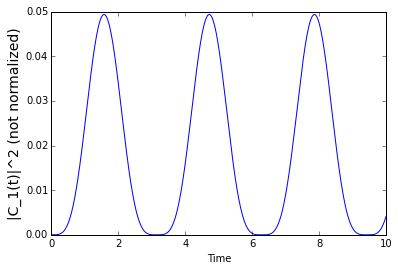

In [65]:
#Set the value of omega_f to off-resonance
omega_f = 3.0
#Create a time array, t = 0 to 10
t_array = np.arange(0,10,0.01)

#################################################################
# (ONE LINE) CALL THE overlap FUNCTION TO CALCULATE c_1(t). 
# Assign it to a variable called c1_t
c1_t = overlap(t_array, omega_f)
#################################################################

#Square it to get a "probability" of transition to excited state
#(Don't worry about the fact that it's not properly normalized)
prob_excited_state = np.abs(c1_t**2)

#Let's plot.
plt.plot(t_array, prob_excited_state)
plt.xlabel('Time')
plt.ylabel('|C_1(t)|^2 (not normalized)', fontsize = 14)
plt.show()

Now use the "overlap" function above to compute the overlap $c_1(t)$ of the time-dependent wave function with the first excited state for the case where $\omega_f = 1.05$ (NEAR-RESONANCE) for different times.  Then compute $|c_1(t)|^2$ and plot as a function of time. 

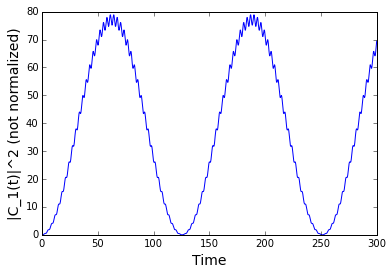

In [66]:
#Set the value of omega_f to near-resonance
omega_f = 1.05
#Create a time array, t = 0 to 10
t_array = np.arange(0,300,0.01)

#################################################################
# (ONE LINE) CALL THE overlap FUNCTION TO CALCULATE c_1(t). 
# Assign it to a variable called c1_t
c1_t = overlap(t_array, omega_f)
#################################################################

#Square it to get a "probability" of transition to excited state
#(Don't worry about the fact that it's not properly normalized)
prob_excited_state = np.abs(c1_t**2)

#Let's plot.
plt.plot(t_array, prob_excited_state)
plt.xlabel('Time', fontsize = 14)
plt.ylabel('|C_1(t)|^2 (not normalized)', fontsize = 14)
plt.show()

#### <i class="fa fa-gear"></i> Question: How does the amplitude change between the resonance and the non-resonance case? Discuss it with your classmates.

### <i class="fa fa-wrench"></i> Step 5: Calculate the IR spectrum.

The average transition amplitude to the first excited state at a particular $\omega_f$ ($A_{0 \to 1}(;\omega_f)$), is obtained by integrating $c_1(t;\omega_f)$ over time:

$$A_{0 \to 1}(;\omega_f)=\int_{0}^{t}c_1(t;\omega_f)\;dt$$ 

Now, let's create an array of many values of $\omega_f$ and for each one of these values of $\omega_f$ we'll calculate $A_{0 \to 1}(;\omega_f)$, as shown above. By squaring $A_{0 \to 1}(;\omega_f)$, we'll get the value of the intensity at that particular $\omega_f$, which corresponds to the average transition probability, $P_{0 \to 1}(;\omega_f)$:

$$P_{0 \to 1}(;\omega_f)=|A_{0 \to 1}(;\omega_f)|^2$$

The intensity of the transition is proportional to the average transition probability, and a plot of $P_{0 \to 1}(;\omega_f)$ as a function of $\omega_f$ constitutes an spectrum. Molecular vibrations, which are modeled as harmonic oscillators, have transition energies that corresponds to frequencies in the infrared (IR) band of the electromagnetic spectrum.

In [67]:
#Create omega_array, an array of values from -3 to 3, intervals of 0.011
omega_array = np.arange(0,3,0.011)
#Initialize our IR array to a bunch of zeros
IR_array = np.zeros_like(omega_array)
#For each value of omega:
for i in range(len(omega_array)):
    omega_f = omega_array[i]
    #Array of time values
    t_array = np.arange(0,30,0.1)
    #assign to c1_t the overlap as a function of time, by calling the 
    #the overlap function above.
    c1_t = overlap(t_array, omega_f)
    ###########################################################################
    # (ONE LINE) FOR EACH OMEGA, INTEGRATE, USING SIMPS, c1_t OVER TIME
    # TO OBTAIN THE TRANSITION AMPLITUDE AT THAT FREQUENCY AVERAGED OVER TIME
    # assign it to a variable called transition_amplitude
    transition_amplitude = simps(c1_t,t_array)
    ############################################################################
    
    #We'll store the transition probability squared in an array. 
    IR_array[i] = np.abs(transition_amplitude)**2

** Now let's plot our spectrum**

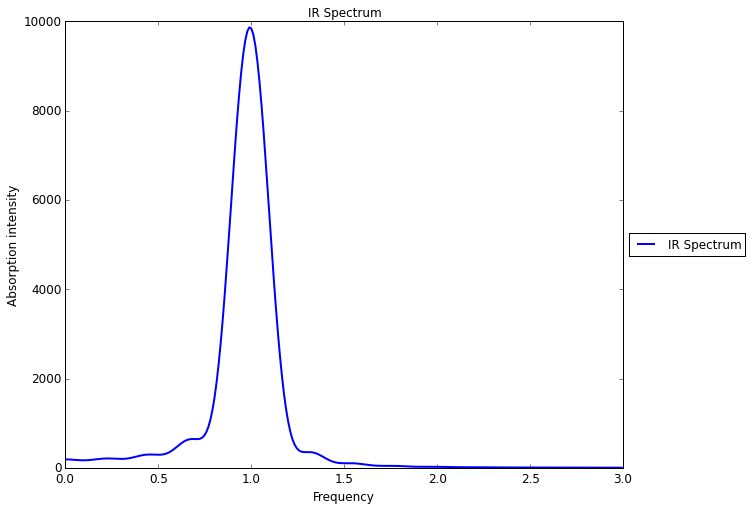

In [68]:
qworld.my_plotting_function(omega_array, [IR_array], ['IR Spectrum'],'IR Spectrum','Frequency','Absorption intensity')

#### <i class="fa fa-gear"></i> Based on the results you've observed so far, discuss how spectroscopy is explained from the perspective of a system interacting with a time dependent field.

### <i class="fa fa-book"></i> Step 6. Check out what you learned in this demo. <br>

#### 1. General solutions for a harmonic oscillator interacting with an electromagnetic field. <br>

#### 2. How light drives transitions between quantum states. <br>

#### 3. How to calculate transition amplitudes and transition probabilities and their role in spectroscopy.